In [10]:
# prompt: mount gopogle drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import zipfile
import os

# Define the path to the uploaded zip file
zip_path = "/content/drive/MyDrive/Case Study 4 - Bankruptcy/data.zip"
# Corrected: extract_path should point to a directory
extract_path = "/content/drive/MyDrive/Case Study 4 - Bankruptcy/"

# Extract the contents of the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List the extracted files to see what we have
extracted_files = os.listdir(extract_path)
extracted_files

['data.zip',
 'Module 8 Class Transcript_KEEP.txt',
 'case_study_4.ipynb',
 'Flu Timeseries for QTW.Rmd',
 'Ayala_Arendale_Kumar_Case_Study_4.Rmd',
 'Case Study 4.ipynb',
 'CaseStudy4_Final.ipynb',
 'Case Study 4.txt',
 '1year.arff',
 '2year.arff',
 '3year.arff',
 '4year.arff',
 '5year.arff']

In [12]:
!pip install liac-arff

In [15]:
from scipy.io import arff
import pandas as pd
from IPython.display import display

# Load one of the .arff files to inspect the structure
arff_file_path = os.path.join(extract_path, "1year.arff")

# Read the ARFF file
data, meta = arff.loadarff(arff_file_path)

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows
# Instead of using ace_tools, use IPython.display.display
display(df.head(n=10)) # Displaying the first 10 rows as an example

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.379510,0.396410,2.0472,32.3510,0.38825,0.249760,1.33050,1.13890,0.50494,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.6580,4.4158,7.4277,b'0'
1,0.209120,0.499880,0.472250,1.9447,14.7860,0.00000,0.258340,0.99601,1.69960,0.49788,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.3500,3.4000,60.9870,b'0'
2,0.248660,0.695920,0.267130,1.5548,-1.1523,0.00000,0.309060,0.43695,1.30900,0.30408,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.2700,2.7185,5.2078,b'0'
3,0.081483,0.307340,0.458790,2.4928,51.9520,0.14988,0.092704,1.86610,1.05710,0.57353,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.4350,4.2228,5.5497,b'0'
4,0.187320,0.613230,0.229600,1.4063,-7.3128,0.18732,0.187320,0.63070,1.15590,0.38677,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.2100,2.8692,7.8980,b'0'
5,0.228220,0.497940,0.359690,1.7502,-47.7170,0.00000,0.281390,1.00830,1.97860,0.50206,...,0.139320,0.454570,0.85891,0.023002,3.4028,8.9949,88.4440,4.1269,12.2990,b'0'
6,0.111090,0.647440,0.289710,1.4705,2.5349,0.00000,0.111090,0.54454,1.73480,0.35256,...,0.605900,0.315100,0.40871,0.000000,6.3222,2.9098,129.5500,2.8173,18.3520,b'0'
7,0.532320,0.027059,0.705540,53.9540,299.5800,0.00000,0.652400,35.95700,0.65273,0.97294,...,0.086730,0.547130,0.49521,0.013194,9.1300,82.0500,7.4503,48.9910,2.3217,b'0'
8,0.009020,0.632020,0.053735,1.1263,-37.8420,0.00000,0.014434,0.58223,1.33320,0.36798,...,0.180110,0.024512,0.84165,0.340940,9.9665,4.2382,116.5000,3.1330,2.5603,b'0'
9,0.124080,0.838370,0.142040,1.1694,-91.8830,0.00000,0.153280,0.19279,2.11560,0.16163,...,0.079665,0.767680,0.92847,0.000000,3.3192,6.4994,144.6300,2.5236,107.6700,b'0'


In [17]:
# Load and preprocess all five years of data
all_data = []

for year in range(1, 6):
    arff_file_path = os.path.join(extract_path, f"{year}year.arff")
    data, meta = arff.loadarff(arff_file_path)
    df = pd.DataFrame(data)

    # Convert class label from bytes to integers
    df['class'] = df['class'].apply(lambda x: int(x.decode('utf-8')))

    # Append to list
    all_data.append(df)

# Combine all years into one DataFrame
df_combined = pd.concat(all_data, ignore_index=True)

# Handle missing values (replace '?' with NaN and fill with median)
df_combined.replace('?', pd.NA, inplace=True)
df_combined = df_combined.apply(pd.to_numeric, errors='coerce')  # Convert all to numeric

# Fill missing values with the median of each column
df_combined.fillna(df_combined.median(), inplace=True)

# Display the cleaned dataset
# Instead of tools.display_dataframe_to_user, use IPython.display.display
from IPython.display import display
display(df_combined)
# You can also print some info about the DataFrame:
print(f"Shape of the cleaned dataset: {df_combined.shape}")
print(f"Data types in the cleaned dataset:\n{df_combined.dtypes}")

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,0
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,0
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,0
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,0
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43400,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,1
43401,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,1
43402,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,1
43403,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,1


Shape of the cleaned dataset: (43405, 65)
Data types in the cleaned dataset:
Attr1     float64
Attr2     float64
Attr3     float64
Attr4     float64
Attr5     float64
           ...   
Attr61    float64
Attr62    float64
Attr63    float64
Attr64    float64
class       int64
Length: 65, dtype: object


In [18]:
from google.colab import drive
import zipfile
import os
from scipy.io import arff
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')

# Define the path to the uploaded zip file
zip_path = "/content/drive/MyDrive/Case Study 4 - Bankruptcy/data.zip"
# Corrected: extract_path should point to a directory
extract_path = "/content/drive/MyDrive/Case Study 4 - Bankruptcy/"

# Extract the contents of the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List the extracted files to see what we have
extracted_files = os.listdir(extract_path)
extracted_files

!pip install liac-arff

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# Load and preprocess all five years of data
all_data = []

for year in range(1, 6):
    arff_file_path = os.path.join(extract_path, f"{year}year.arff")
    data, meta = arff.loadarff(arff_file_path)
    df = pd.DataFrame(data)

    # Convert class label from bytes to integers
    df['class'] = df['class'].apply(lambda x: int(x.decode('utf-8')))

    # Append to list
    all_data.append(df)

# Combine all years into one DataFrame
df_combined = pd.concat(all_data, ignore_index=True)

# Handle missing values (replace '?' with NaN and fill with median)
df_combined.replace('?', pd.NA, inplace=True)
df_combined = df_combined.apply(pd.to_numeric, errors='coerce')  # Convert all to numeric

# Fill missing values with the median of each column
df_combined.fillna(df_combined.median(), inplace=True)

# Now use the combined and preprocessed dataframe
data = df_combined

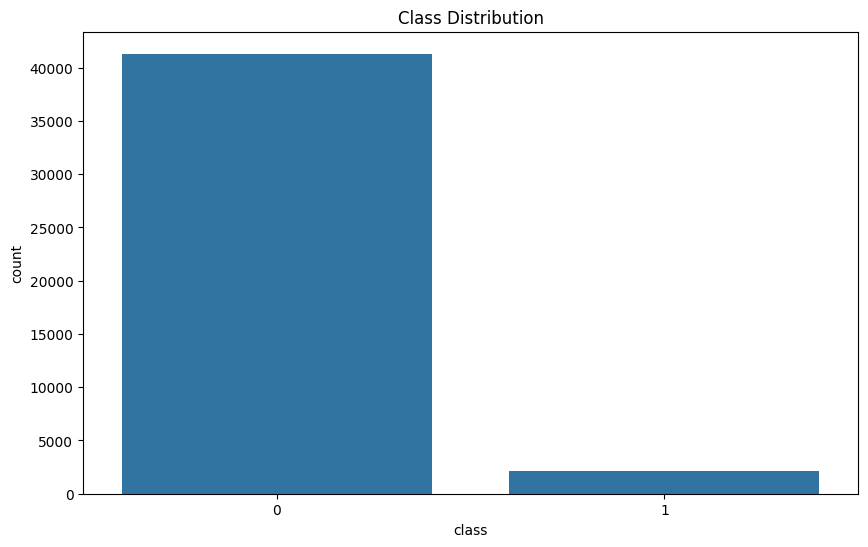

In [20]:
# Data Preprocessing
# Splitting features and target variable
target = 'class' # use 'class' column as target variable
X = data.drop(columns=[target])
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10,6))
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()

Random Forest Model Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8263
           1       0.97      0.23      0.37       418

    accuracy                           0.96      8681
   macro avg       0.97      0.61      0.68      8681
weighted avg       0.96      0.96      0.95      8681

ROC AUC: 0.9248569891607656


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:41:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8263
           1       0.94      0.54      0.68       418

    accuracy                           0.98      8681
   macro avg       0.96      0.77      0.83      8681
weighted avg       0.98      0.98      0.97      8681

ROC AUC: 0.9760877017337332


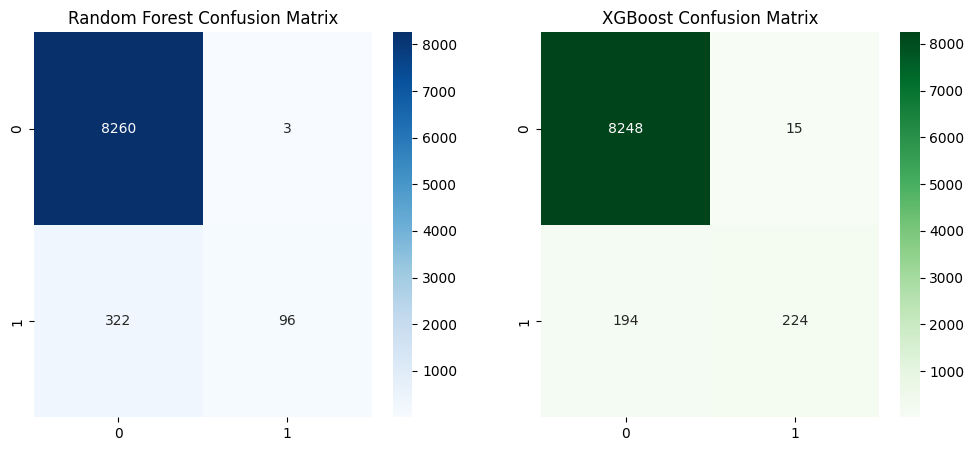

In [21]:
# Random Forest Model with Hyperparameter Tuning
rf_params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(rf, param_distributions=rf_params, n_iter=10, cv=5, scoring='roc_auc', n_jobs=-1)
rf_random.fit(X_train, y_train)

# Best model evaluation
y_pred_rf = rf_random.best_estimator_.predict(X_test)
print("Random Forest Model Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf_random.best_estimator_.predict_proba(X_test)[:, 1]))

# XGBoost Model with Hyperparameter Tuning
xgb_params = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 1.0]
}
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_random = RandomizedSearchCV(xgb, param_distributions=xgb_params, n_iter=10, cv=5, scoring='roc_auc', n_jobs=-1)
xgb_random.fit(X_train, y_train)

# Best model evaluation
y_pred_xgb = xgb_random.best_estimator_.predict(X_test)
print("XGBoost Model Report:")
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, xgb_random.best_estimator_.predict_proba(X_test)[:, 1]))

# Confusion Matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title("Random Forest Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title("XGBoost Confusion Matrix")
plt.show()


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from google.colab import drive
from scipy.io import arff # Import the arff module

# Mount Google Drive
drive.mount('/content/drive')

# Load Data (Ensure correct path in Google Drive)
data_paths = [
    '/content/drive/MyDrive/Case Study 4 - Bankruptcy/1year.arff',
    '/content/drive/MyDrive/Case Study 4 - Bankruptcy/2year.arff',
    '/content/drive/MyDrive/Case Study 4 - Bankruptcy/3year.arff',
    '/content/drive/MyDrive/Case Study 4 - Bankruptcy/4year.arff',
    '/content/drive/MyDrive/Case Study 4 - Bankruptcy/5year.arff'
]

# Use arff.loadarff to load the data, then convert to DataFrame
data_list = []
for path in data_paths:
    data, meta = arff.loadarff(path) # Load using arff.loadarff
    df = pd.DataFrame(data)
    data_list.append(df)


data = pd.concat(data_list, ignore_index=True)  # Adjust the filename and path as needed

# Convert 'class' column to integers (it's likely loaded as bytes)
data['class'] = data['class'].apply(lambda x: int(x.decode()) if isinstance(x, bytes) else int(x))


# Data Preprocessing
# Handling missing values
# Replace '?' with NaN and then fill with median
data.replace('?', pd.NA, inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')  # Convert all to numeric
data.fillna(data.median(), inplace=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
# # Data Preprocessing
# # Handling missing values
# data.dropna(inplace=True)

# # Splitting features and target variable
# target = 'Bankruptcy'
# X = data.drop(columns=[target])
# y = data[target]

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Exploratory Data Analysis (EDA)
# plt.figure(figsize=(10,6))
# sns.countplot(x=y)
# plt.title("Class Distribution")
# plt.show()

In [27]:
# Random Forest Model with Hyperparameter Tuning
rf_params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(rf, param_distributions=rf_params, n_iter=10, cv=5, scoring='roc_auc', n_jobs=-1)
rf_random.fit(X_train, y_train)

# Best model evaluation
y_pred_rf = rf_random.best_estimator_.predict(X_test)
print("Random Forest Model Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf_random.best_estimator_.predict_proba(X_test)[:, 1]))


Random Forest Model Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8263
           1       0.98      0.22      0.36       418

    accuracy                           0.96      8681
   macro avg       0.97      0.61      0.67      8681
weighted avg       0.96      0.96      0.95      8681

ROC AUC: 0.9258795912139607


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:36:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8263
           1       0.95      0.59      0.73       418

    accuracy                           0.98      8681
   macro avg       0.97      0.79      0.86      8681
weighted avg       0.98      0.98      0.98      8681

ROC AUC: 0.978499299639194


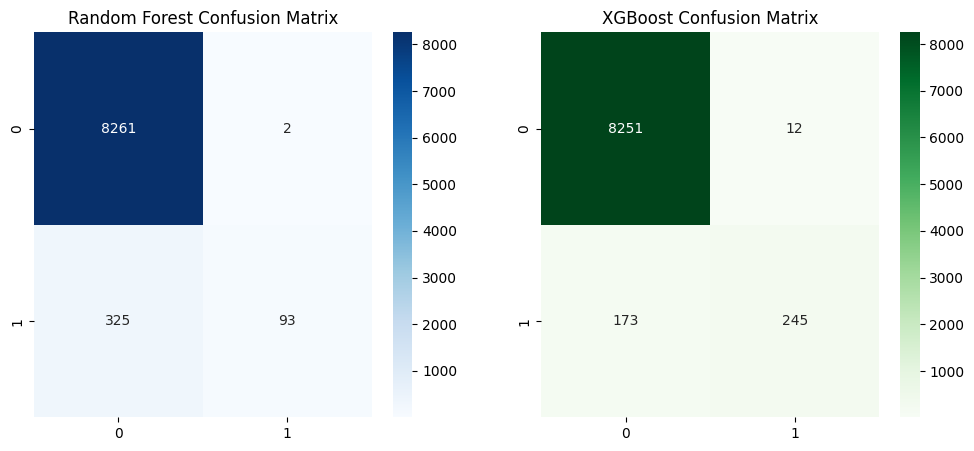

In [29]:
# XGBoost Model with Hyperparameter Tuning
xgb_params = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 1.0]
}
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_random = RandomizedSearchCV(xgb, param_distributions=xgb_params, n_iter=10, cv=5, scoring='roc_auc', n_jobs=-1)
xgb_random.fit(X_train, y_train)

# Best model evaluation
y_pred_xgb = xgb_random.best_estimator_.predict(X_test)
print("XGBoost Model Report:")
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, xgb_random.best_estimator_.predict_proba(X_test)[:, 1]))

# Confusion Matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title("Random Forest Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title("XGBoost Confusion Matrix")
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Available columns: ['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8', 'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15', 'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22', 'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29', 'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36', 'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43', 'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50', 'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57', 'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64', 'class']


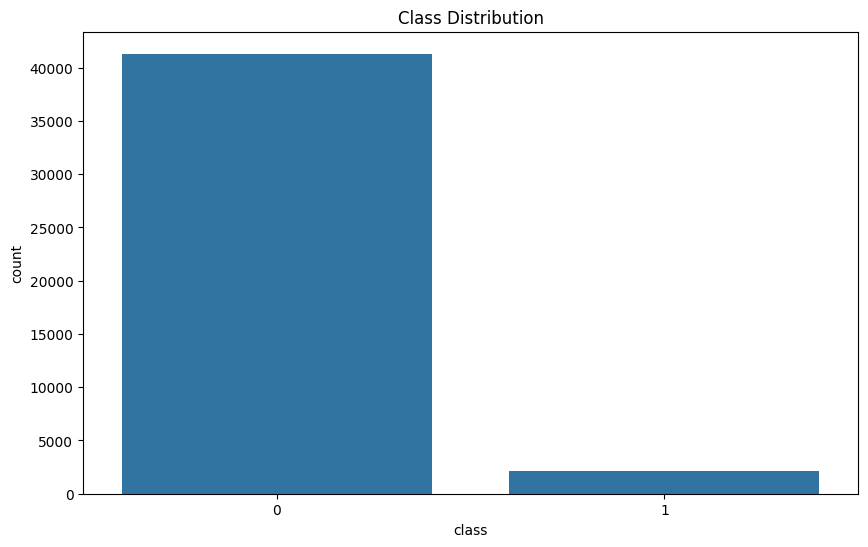

/usr/local/lib/python3.11/dist-packages/sklearn/utils/multiclass.py:367: FutureWarning: Support for labels represented as bytes is deprecated in v1.5 and will error in v1.7. Convert the labels to a string or integer format.
  warnings.warn(


ValueError: You appear to be using a legacy multi-label data representation. Sequence of sequences are no longer supported; use a binary array or sparse matrix instead - the MultiLabelBinarizer transformer can convert to this format.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load Data (Ensure correct path in Google Drive)
data_paths = [
    '/content/drive/MyDrive/Case Study 4 - Bankruptcy/1year.arff',
    '/content/drive/MyDrive/Case Study 4 - Bankruptcy/2year.arff',
    '/content/drive/MyDrive/Case Study 4 - Bankruptcy/3year.arff',
    '/content/drive/MyDrive/Case Study 4 - Bankruptcy/4year.arff',
    '/content/drive/MyDrive/Case Study 4 - Bankruptcy/5year.arff'
]

# Read ARFF files
def load_arff_data(path):
    from scipy.io import arff
    data, meta = arff.loadarff(path)
    df = pd.DataFrame(data)
    df.columns = [col.decode('utf-8') if isinstance(col, bytes) else col for col in df.columns]  # Ensure string column names
    return df

data_list = [load_arff_data(path) for path in data_paths]
data = pd.concat(data_list, ignore_index=True)

# Inspect column names to check for issues
print("Available columns:", data.columns.tolist())

# Standardize column names to remove spaces and ensure correct parsing
data.columns = data.columns.str.strip().str.replace(' ', '_').str.lower()

# Ensure target column exists
# Updated target_variations to include 'class' which is likely the actual target column name
target_variations = ['bankruptcy', 'Bankruptcy', 'bankrupt', 'default', 'class']
target = None
for col in target_variations:
    if col.lower() in data.columns:
        target = col.lower()
        break
if not target:
    raise KeyError("Target column not found in dataset. Please verify column names.")

# Splitting features and target variable
X = data.drop(columns=[target])
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10,6))
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()

# Random Forest Model with Hyperparameter Tuning
rf_params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(rf, param_distributions=rf_params, n_iter=10, cv=5, scoring='roc_auc', n_jobs=-1)
rf_random.fit(X_train, y_train)

# Best model evaluation
y_pred_rf = rf_random.best_estimator_.predict(X_test)
print("Random Forest Model Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf_random.best_estimator_.predict_proba(X_test)[:, 1]))

# XGBoost Model with Hyperparameter Tuning
xgb_params = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 1.0]
}
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_random = RandomizedSearchCV(xgb, param_distributions=xgb_params, n_iter=10, cv=5, scoring='roc_auc', n_jobs=-1)
xgb_random.fit(X_train, y_train)

# Best model evaluation
y_pred_xgb = xgb_random.best_estimator_.predict(X_test)
print("XGBoost Model Report:")
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, xgb_random.best_estimator_.predict_proba(X_test)[:, 1]))

# Confusion Matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title("Random Forest Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title("XGBoost Confusion Matrix")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from google.colab import drive
from scipy.io import arff

# Mount Google Drive
drive.mount('/content/drive')

# Load Data (Ensure correct path in Google Drive)
data_paths = [
    '/content/drive/MyDrive/Case Study 4 - Bankruptcy/1year.arff',
    '/content/drive/MyDrive/Case Study 4 - Bankruptcy/2year.arff',
    '/content/drive/MyDrive/Case Study 4 - Bankruptcy/3year.arff',
    '/content/drive/MyDrive/Case Study 4 - Bankruptcy/4year.arff',
    '/content/drive/MyDrive/Case Study 4 - Bankruptcy/5year.arff'
]

# Read ARFF files
def load_arff_data(path):
    data, meta = arff.loadarff(path)
    df = pd.DataFrame(data)
    # Decode byte strings to strings for all columns
    for col in df.columns:
        if df[col].dtype == 'object':  # Check if the column is of object type (likely contains byte strings)
            df[col] = df[col].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
    return df

data_list = [load_arff_data(path) for path in data_paths]
data = pd.concat(data_list, ignore_index=True)

# Inspect column names to check for issues
print("Available columns:", data.columns.tolist())

# Standardize column names to remove spaces and ensure correct parsing
data.columns = data.columns.str.strip().str.replace(' ', '_').str.lower()

# Ensure target column exists
target_variations = ['bankruptcy', 'bankrupt', 'class']
target = None
for col in target_variations:
    if col in data.columns:
        target = col
        break
if not target:
    raise KeyError("Target column not found in dataset. Available columns: " + str(data.columns.tolist()))

# Convert target variable to numeric if necessary
# Explicitly convert the target column to numeric, handling errors
data[target] = pd.to_numeric(data[target], errors='coerce')
# If any values are not successfully converted, they will be replaced with NaN
# You can drop rows with NaN values in the target or fill them with an appropriate strategy

# Splitting features and target variable
X = data.drop(columns=[target])
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [33]:
y = pd.to_numeric(y, errors='coerce')  # Force numeric conversion, handle errors


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


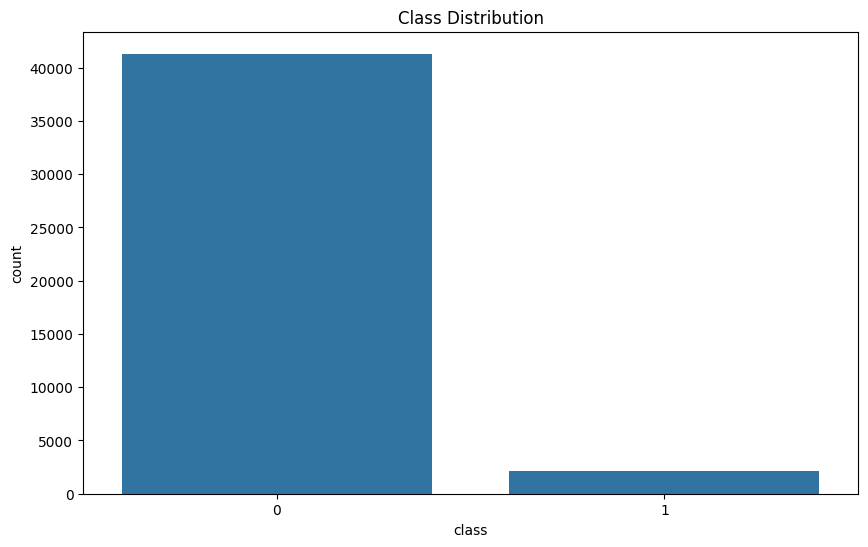

Random Forest Model Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8263
           1       0.99      0.31      0.47       418

    accuracy                           0.97      8681
   macro avg       0.98      0.66      0.73      8681
weighted avg       0.97      0.97      0.96      8681

ROC AUC: 0.9286294990002704


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:53:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8263
           1       0.94      0.57      0.71       418

    accuracy                           0.98      8681
   macro avg       0.96      0.78      0.85      8681
weighted avg       0.98      0.98      0.97      8681

ROC AUC: 0.9765156195804553


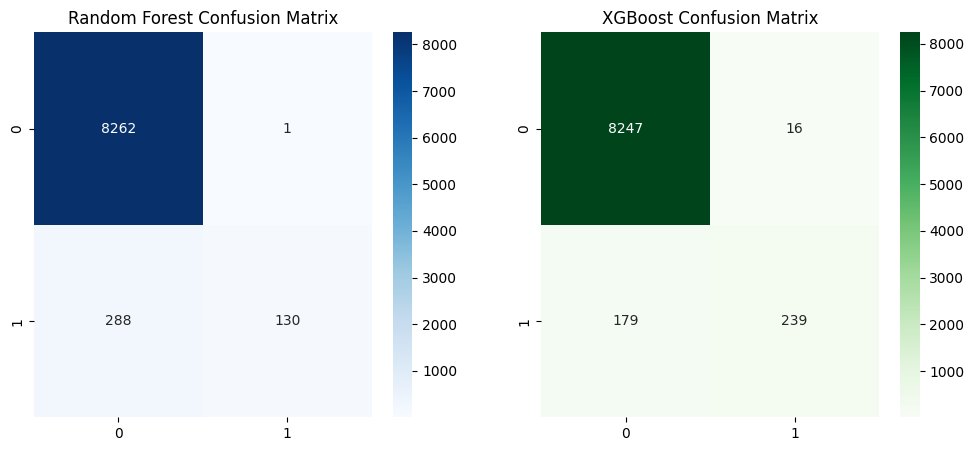

In [35]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10,6))
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()

# Random Forest Model with Hyperparameter Tuning
rf_params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(rf, param_distributions=rf_params, n_iter=10, cv=5, scoring='roc_auc', n_jobs=-1)
rf_random.fit(X_train, y_train)

# Best model evaluation
y_pred_rf = rf_random.best_estimator_.predict(X_test)
print("Random Forest Model Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf_random.best_estimator_.predict_proba(X_test)[:, 1]))

# XGBoost Model with Hyperparameter Tuning
xgb_params = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 1.0]
}
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_random = RandomizedSearchCV(xgb, param_distributions=xgb_params, n_iter=10, cv=5, scoring='roc_auc', n_jobs=-1)
xgb_random.fit(X_train, y_train)

# Best model evaluation
y_pred_xgb = xgb_random.best_estimator_.predict(X_test)
print("XGBoost Model Report:")
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, xgb_random.best_estimator_.predict_proba(X_test)[:, 1]))

# Confusion Matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title("Random Forest Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title("XGBoost Confusion Matrix")
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Available columns: ['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8', 'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15', 'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22', 'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29', 'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36', 'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43', 'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50', 'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57', 'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64', 'class']


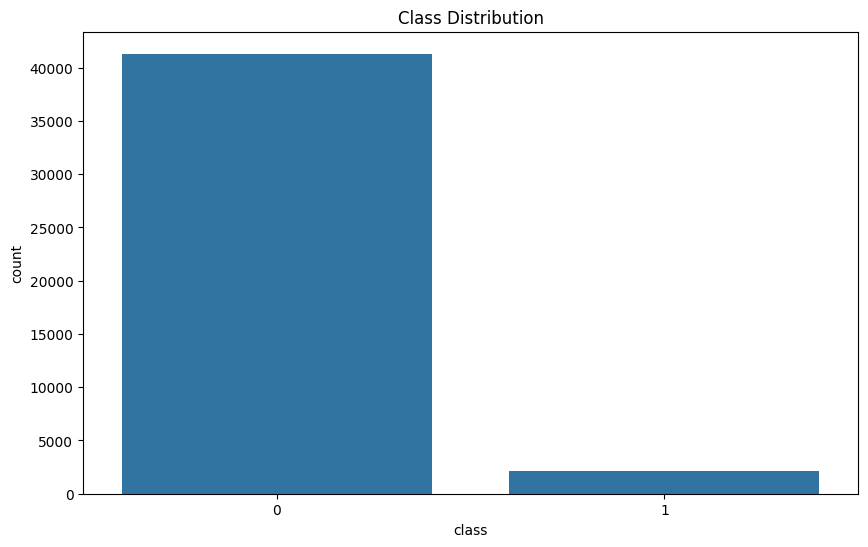

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load Data (Ensure correct path in Google Drive)
data_paths = [
    '/content/drive/MyDrive/Case Study 4 - Bankruptcy/1year.arff',
    '/content/drive/MyDrive/Case Study 4 - Bankruptcy/2year.arff',
    '/content/drive/MyDrive/Case Study 4 - Bankruptcy/3year.arff',
    '/content/drive/MyDrive/Case Study 4 - Bankruptcy/4year.arff',
    '/content/drive/MyDrive/Case Study 4 - Bankruptcy/5year.arff'
]

# Read ARFF files
def load_arff_data(path):
    from scipy.io import arff
    data, meta = arff.loadarff(path)
    df = pd.DataFrame(data)
    df.columns = [col.decode('utf-8') if isinstance(col, bytes) else col for col in df.columns]  # Ensure string column names
    return df

data_list = [load_arff_data(path) for path in data_paths]
data = pd.concat(data_list, ignore_index=True)

# Inspect column names to check for issues
print("Available columns:", data.columns.tolist())

# Standardize column names to remove spaces and ensure correct parsing
data.columns = data.columns.str.strip().str.replace(' ', '_').str.lower()

# Ensure target column exists
# Updated target_variations to include 'class' which is likely the actual target column name
target_variations = ['bankruptcy', 'Bankruptcy', 'bankrupt', 'default', 'class']
target = None
for col in target_variations:
    if col.lower() in data.columns:
        target = col.lower()
        break

# If target is still None, it means none of the expected target columns were found
if not target:
    # Print available columns for debugging
    print("Available columns:", data.columns.tolist())
    raise KeyError("Target column not found in dataset. Please verify column names.")

# Splitting features and target variable
X = data.drop(columns=[target])
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10,6))
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()

# Random Forest Model with Hyperparameter Tuning


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-41-3da7e0b5c647>:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)  # Ensure string column values


Available columns: ['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8', 'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15', 'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22', 'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29', 'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36', 'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43', 'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50', 'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57', 'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64', 'class']


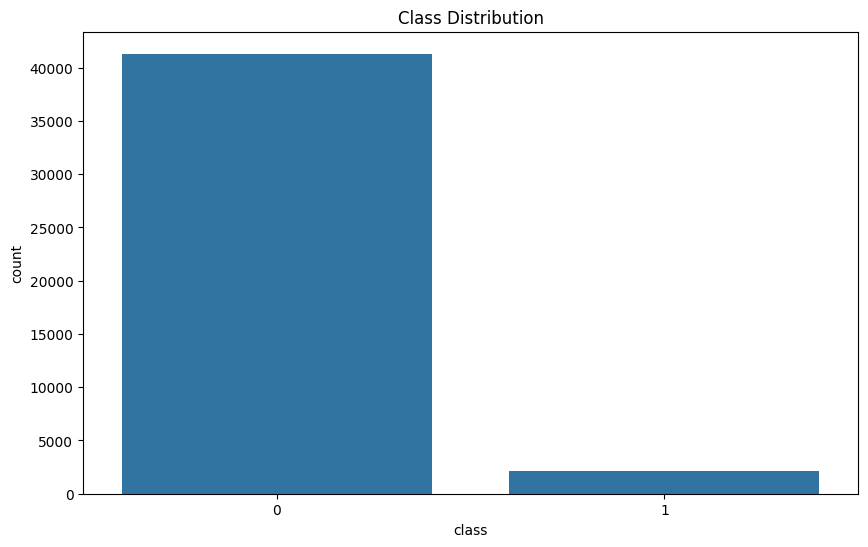

Random Forest Model Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8263
           1       0.95      0.35      0.52       418

    accuracy                           0.97      8681
   macro avg       0.96      0.68      0.75      8681
weighted avg       0.97      0.97      0.96      8681

ROC AUC: 0.9295805883957251


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:20:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8263
           1       0.95      0.58      0.72       418

    accuracy                           0.98      8681
   macro avg       0.97      0.79      0.86      8681
weighted avg       0.98      0.98      0.98      8681

ROC AUC: 0.9763585523058635


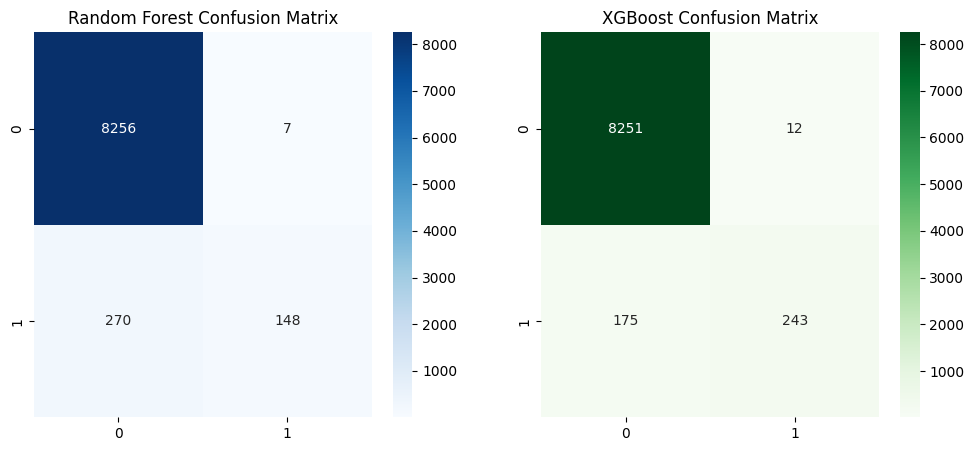

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from google.colab import drive
from scipy.io import arff

# Mount Google Drive
drive.mount('/content/drive')

# Load Data (Ensure correct path in Google Drive)
data_paths = [
    '/content/drive/MyDrive/Case Study 4 - Bankruptcy/1year.arff',
    '/content/drive/MyDrive/Case Study 4 - Bankruptcy/2year.arff',
    '/content/drive/MyDrive/Case Study 4 - Bankruptcy/3year.arff',
    '/content/drive/MyDrive/Case Study 4 - Bankruptcy/4year.arff',
    '/content/drive/MyDrive/Case Study 4 - Bankruptcy/5year.arff'
]

# Read ARFF files
def load_arff_data(path):
    data, meta = arff.loadarff(path)
    df = pd.DataFrame(data)
    df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)  # Ensure string column values
    return df

data_list = [load_arff_data(path) for path in data_paths]
data = pd.concat(data_list, ignore_index=True)

# Inspect column names to check for issues
print("Available columns:", data.columns.tolist())

# Standardize column names to remove spaces and ensure correct parsing
data.columns = data.columns.str.strip().str.replace(' ', '_').str.lower()

# Ensure target column exists
target_variations = ['bankruptcy', 'bankrupt', 'class']
target = None
for col in target_variations:
    if col in data.columns:
        target = col
        break
if not target:
    raise KeyError("Target column not found in dataset. Available columns: " + str(data.columns.tolist()))

# Convert target variable to numeric if necessary
data[target] = pd.to_numeric(data[target], errors='coerce')

# Splitting features and target variable
X = data.drop(columns=[target])
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10,6))
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()

# Random Forest Model with Hyperparameter Tuning
rf_params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(rf, param_distributions=rf_params, n_iter=10, cv=5, scoring='roc_auc', n_jobs=-1)
rf_random.fit(X_train, y_train)

# Best model evaluation
y_pred_rf = rf_random.best_estimator_.predict(X_test)
print("Random Forest Model Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf_random.best_estimator_.predict_proba(X_test)[:, 1]))

# XGBoost Model with Hyperparameter Tuning
xgb_params = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 1.0]
}
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_random = RandomizedSearchCV(xgb, param_distributions=xgb_params, n_iter=10, cv=5, scoring='roc_auc', n_jobs=-1)
xgb_random.fit(X_train, y_train)

# Best model evaluation
y_pred_xgb = xgb_random.best_estimator_.predict(X_test)
print("XGBoost Model Report:")
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, xgb_random.best_estimator_.predict_proba(X_test)[:, 1]))

# Confusion Matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title("Random Forest Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title("XGBoost Confusion Matrix")
plt.show()


In [43]:
import pandas as pd
from scipy.io import arff
from google.colab import drive

# Mount Google Drive (if not already mounted)
drive.mount('/content/drive')

# List of ARFF files with full paths
arff_files = [
    "/content/drive/MyDrive/Case Study 4 - Bankruptcy/1year.arff",
    "/content/drive/MyDrive/Case Study 4 - Bankruptcy/2year.arff",
    "/content/drive/MyDrive/Case Study 4 - Bankruptcy/3year.arff",
    "/content/drive/MyDrive/Case Study 4 - Bankruptcy/4year.arff",
    "/content/drive/MyDrive/Case Study 4 - Bankruptcy/5year.arff"
]

# Convert each ARFF file to CSV
for file in arff_files:
    data, meta = arff.loadarff(file)  # Now using the full path
    df = pd.DataFrame(data)

    # Convert byte columns to string if necessary
    for col in df.select_dtypes([object]):
        df[col] = df[col].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

    # Save as CSV
    csv_filename = file.replace(".arff", ".csv")
    df.to_csv(csv_filename, index=False)
    print(f"Converted {file} to {csv_filename}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Converted /content/drive/MyDrive/Case Study 4 - Bankruptcy/1year.arff to /content/drive/MyDrive/Case Study 4 - Bankruptcy/1year.csv
Converted /content/drive/MyDrive/Case Study 4 - Bankruptcy/2year.arff to /content/drive/MyDrive/Case Study 4 - Bankruptcy/2year.csv
Converted /content/drive/MyDrive/Case Study 4 - Bankruptcy/3year.arff to /content/drive/MyDrive/Case Study 4 - Bankruptcy/3year.csv
Converted /content/drive/MyDrive/Case Study 4 - Bankruptcy/4year.arff to /content/drive/MyDrive/Case Study 4 - Bankruptcy/4year.csv
Converted /content/drive/MyDrive/Case Study 4 - Bankruptcy/5year.arff to /content/drive/MyDrive/Case Study 4 - Bankruptcy/5year.csv


(651.1282315254211,
 0.9663501815135437,
 0.40499306518723993,
 0.8463768115942029,
 array([[13550,    53],
        [  429,   292]]))

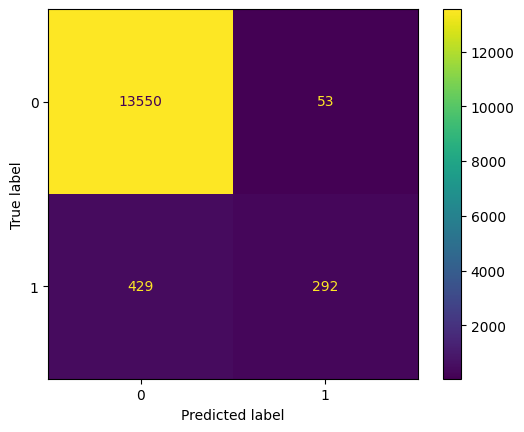

In [46]:
# Load CSV files
file_paths = {
    "1year": "/content/drive/MyDrive/Case Study 4 - Bankruptcy/1year.csv", # Change .arff to .csv
    "2year": "/content/drive/MyDrive/Case Study 4 - Bankruptcy/2year.csv", # Change .arff to .csv
    "3year": "/content/drive/MyDrive/Case Study 4 - Bankruptcy/3year.csv", # Change .arff to .csv
    "4year": "/content/drive/MyDrive/Case Study 4 - Bankruptcy/4year.csv", # Change .arff to .csv
    "5year": "/content/drive/MyDrive/Case Study 4 - Bankruptcy/5year.csv"  # Change .arff to .csv
}


# Read and combine data
df = pd.read_csv(file_paths["1year"])
for year, path in file_paths.items():
    if year != "1year":
        df_temp = pd.read_csv(path)
        df = df.merge(df_temp, how='outer')

# Convert class labels to integers if needed
df['class'] = df['class'].replace({b'0': 0, b'1': 1}).astype(int)

# Drop specified columns
df = df.drop(["Attr21", "Attr37"], axis=1, errors='ignore')

# Prepare train/test data
X = df.loc[:, df.columns != 'class'].values
y = df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Impute missing values
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imp_mean.fit_transform(X_train)
X_test = imp_mean.transform(X_test)

# Normalize data
transformer = RobustScaler().fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

# Build classifier
clf = RandomForestClassifier(n_estimators=20)

# Define hyperparameter search space
param_dist = {
    "max_depth": [3, None],
    "max_features": sp_randint(1, 11),
    "min_samples_split": sp_randint(2, 11),
    "bootstrap": [True, False],+
    "criterion": ["gini", "entropy"]
}

# Run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=n_iter_search, random_state=42)
start = time()
random_search.fit(X_train, y_train)
search_time = time() - start

# Evaluate model
y_hat_rf_test = random_search.predict(X_test)
accuracy = accuracy_score(y_hat_rf_test, y_test)
recall = recall_score(y_test, y_hat_rf_test, pos_label=1, average='binary')
precision = precision_score(y_test, y_hat_rf_test, pos_label=1, average='binary')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_hat_rf_test)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()

# Show metrics
search_time, accuracy, recall, precision, conf_matrix


RandomizedSearchCV Time: 632.24 seconds
Accuracy: 0.969
Recall: 0.437
Precision: 0.895


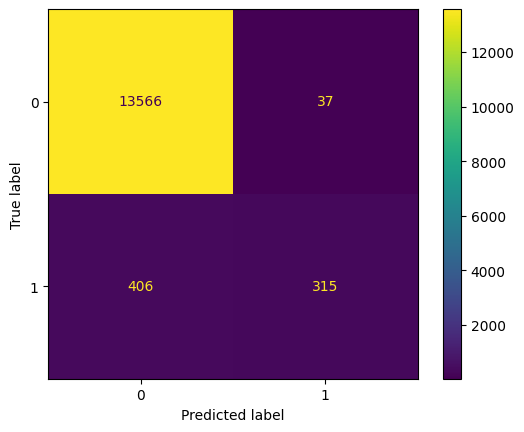

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

# Load CSV file
file_path = "/content/drive/MyDrive/Case Study 4 - Bankruptcy/merged_data.csv"  # Ensure the file is in your working directory

# Read the dataset
df = pd.read_csv(file_path)

# Convert class labels to integers if needed
df['class'] = df['class'].replace({b'0': 0, b'1': 1}).astype(int)

# Drop specified columns if they exist
df = df.drop(["Attr21", "Attr37"], axis=1, errors='ignore')

# Prepare train/test data
X = df.loc[:, df.columns != 'class'].values
y = df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Impute missing values
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imp_mean.fit_transform(X_train)
X_test = imp_mean.transform(X_test)

# Normalize data
transformer = RobustScaler().fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

# Build classifier
clf = RandomForestClassifier(n_estimators=20)

# Define hyperparameter search space
param_dist = {
    "max_depth": [3, None],
    "max_features": sp_randint(1, 11),
    "min_samples_split": sp_randint(2, 11),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]
}

# Run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=n_iter_search, random_state=42)
start = time()
random_search.fit(X_train, y_train)
search_time = time() - start

# Evaluate model
y_hat_rf_test = random_search.predict(X_test)
accuracy = accuracy_score(y_hat_rf_test, y_test)
recall = recall_score(y_test, y_hat_rf_test, pos_label=1, average='binary')
precision = precision_score(y_test, y_hat_rf_test, pos_label=1, average='binary')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_hat_rf_test)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()

# Print results
print(f"RandomizedSearchCV Time: {search_time:.2f} seconds")
print(f"Accuracy: {accuracy:.3f}")
print(f"Recall: {recall:.3f}")
print(f"Precision: {precision:.3f}")


In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier # Import GradientBoostingClassifier

#  GBM is GradientBoostingClassifier
GBM = GradientBoostingClassifier() # Create and assign the model to GBM

# Perform 5-fold cross-validation to assess model generalization
cv_scores = cross_val_score(GBM, X_train, y_train, cv=5, scoring="accuracy")

# Print results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.3f}")
print(f"Standard Deviation of Accuracy: {np.std(cv_scores):.3f}")

Cross-Validation Accuracy Scores: [0.97129104 0.96922283 0.96750344 0.97059835 0.97162999]
Mean CV Accuracy: 0.970
Standard Deviation of Accuracy: 0.002


In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier # Import GradientBoostingClassifier

#  GBM is GradientBoostingClassifier
GBM = GradientBoostingClassifier() # Create and assign the model to GBM

# Perform 5-fold cross-validation to assess model generalization
cv_scores = cross_val_score(GBM, X_train, y_train, cv=5, scoring="accuracy")

# Print results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.3f}")
print(f"Standard Deviation of Accuracy: {np.std(cv_scores):.3f}")

# Fit the model to the training data before making predictions
GBM.fit(X_train, y_train) # This line is added to fit the model

Cross-Validation Accuracy Scores: [0.97094722 0.96922283 0.96750344 0.97077029 0.97162999]
Mean CV Accuracy: 0.970
Standard Deviation of Accuracy: 0.001


GradientBoostingClassifier()

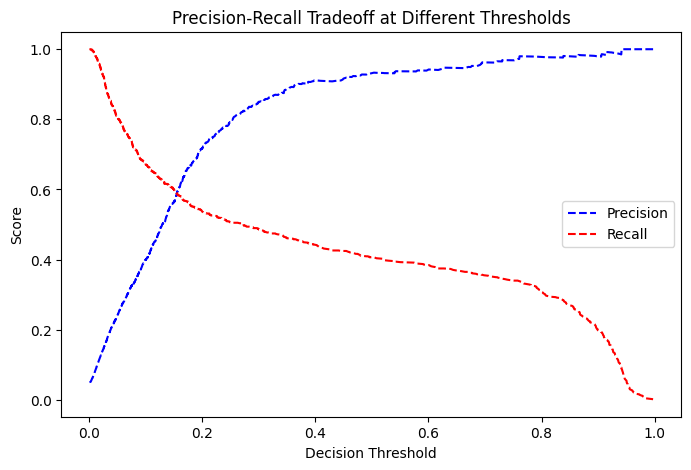

In [54]:
from sklearn.metrics import precision_recall_curve

# Compute the probability scores for the test set
y_scores_gbm = GBM.predict_proba(X_test)[:, 1]

# Compute precision-recall pairs for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_gbm)

# Plot Precision-Recall Curve
plt.figure(figsize=(8,5))
plt.plot(thresholds, precision[:-1], "b--", label="Precision")
plt.plot(thresholds, recall[:-1], "r--", label="Recall")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Tradeoff at Different Thresholds")
plt.legend()
plt.show()


In [55]:
from sklearn.metrics import classification_report

# Choose an alternative threshold
threshold1 = 0.3  # Aggressive (higher recall)
threshold2 = 0.7  # Conservative (higher precision)

# Convert probabilities to binary predictions
y_pred_thresh1 = (y_scores_gbm >= threshold1).astype(int)
y_pred_thresh2 = (y_scores_gbm >= threshold2).astype(int)

# Print classification reports
print("Classification Report at Threshold 0.3:")
print(classification_report(y_test, y_pred_thresh1))

print("\nClassification Report at Threshold 0.7:")
print(classification_report(y_test, y_pred_thresh2))


Classification Report at Threshold 0.3:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     13603
           1       0.85      0.49      0.62       721

    accuracy                           0.97     14324
   macro avg       0.91      0.74      0.80     14324
weighted avg       0.97      0.97      0.97     14324


Classification Report at Threshold 0.7:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     13603
           1       0.96      0.35      0.52       721

    accuracy                           0.97     14324
   macro avg       0.96      0.68      0.75     14324
weighted avg       0.97      0.97      0.96     14324

